# INTRODUCTION 

### POPULATION DATA FROM WORLDMETERS WEBSITE 

This Dataframe consists of different observations based on population,density,fertility rate,land area etc. from the year 2020 .This dataframe has been scrapped form the website Worldmeters.Data is based on the latest United Nations Population Division estimates.

# AIM

The of this project is to firstly scrap the data from the given url and then perfrom basic data exploration and visualization opertions on the dataset like finding null values,changing column name,reports based on density,fertility,graphs to examine the distribution of Population, median age and Urban population and Yearly change.Etc.

In [1]:
#first installing packages for web scrapping 
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install beautifulsoup4 #installing beautiful soup version 4

In [38]:
import numpy as np  #numpy is used for scientific computing in Python
import pandas as pd # pandas stands for “Python Data Analysis Library”
import seaborn as sns #used for making statistical graphics 
import matplotlib.pyplot as plt #matplotlib. pyplot is a collection of functions that make matplotlib work like MATLAB.

In [39]:
import requests # importing requests
from bs4 import BeautifulSoup #importing beautiful soup


url=" https://www.worldometers.info/world-population/population-by-country/"  
req = requests.get(url) #requesting the url to scrap the data
countrylist=pd.read_html(req.text) #reading text only from the html and reading the using pd.read
df=countrylist[0] #creating the dataframe
df

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,233,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [40]:
df=df.drop(['#'], axis = 1) #dropping unnecessary column

# ABOUT DATAFRAME

### There are total 11 varibles or columns and 235 rows or entries in this dataset which are as follows:
{'COUNTRY' ,'POPULATION_2020', 'YEARLY_CHANGE', 'NET_CHANGE', 'DENSITY',
       'LAND_AREA', 'MIGRANTS', 'FERTILITY_RATE', 'MEDIAN_AGE',
       'URBAN_POPULATION', 'WORLD_SHARE'}

In [41]:
df.info() #for cheching datatype and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In this Dataframe expect for country data variable every other data variable is an qunatitative continous type of data and the country is an nominal qualitative data type.Where as we can see from above that python reads the varibles "Yearly Change","fert rate","med.age","urban pop%","world share" as an object (string) data type which is wrong which we will change furthur as per our convinence.

In [42]:
df.isnull().sum() #to check null values 

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

### As we can conclude that in migrant coulmms there are total 34 null values.Where as many columns as we can see have null values as NA or NAN which we will deal with later in the project.

### Changing the column names 

In [43]:
df.rename(columns = {'Country (or dependency)' : 'COUNTRY', 'Med. Age' : 'MEDIAN_AGE','Population (2020)' : 'POPULATION_2020', 'Yearly Change' : 'YEARLY_CHANGE', 'Net Change' : 'NET_CHANGE' , 'Density (P/Km²)' : 'DENSITY' , 'Land Area (Km²)': 'LAND_AREA' , 'Migrants (net)' : 'MIGRANTS' , 'Fert. Rate' : 'FERTILITY_RATE', 'Urban Pop %' : 'URBAN_POPULATION' , 'World Share' : 'WORLD_SHARE'}, inplace = True)
df

,COUNTRY,POPULATION_2020,YEARLY_CHANGE,NET_CHANGE,DENSITY,LAND_AREA,MIGRANTS,FERTILITY_RATE,MEDIAN_AGE,URBAN_POPULATION,WORLD_SHARE
0,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


### The top ten and bottom ten countries based on the density column.

In [45]:
#top 10 countries based on density 
df.sort_values(by='DENSITY', ascending=False).head(10) #sorting the values based on density in descending order

,COUNTRY,POPULATION_2020,YEARLY_CHANGE,NET_CHANGE,DENSITY,LAND_AREA,MIGRANTS,FERTILITY_RATE,MEDIAN_AGE,URBAN_POPULATION,WORLD_SHARE
213,Monaco,39242,0.71 %,278,26337,1,NaN,N.A.,N.A.,N.A.,0.00 %
166,Macao,649335,1.39 %,8890,21645,30,5000.0,1.2,39,N.A.,0.01 %
113,Singapore,5850342,0.79 %,46005,8358,700,27028.0,1.2,42,N.A.,0.08 %
103,Hong Kong,7496981,0.82 %,60827,7140,1050,29308.0,1.3,45,N.A.,0.10 %
218,Gibraltar,33691,-0.03 %,-10,3369,10,NaN,N.A.,N.A.,N.A.,0.00 %
151,Bahrain,1701575,3.68 %,60403,2239,760,47800.0,2.0,32,89 %,0.02 %
234,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %
173,Maldives,540544,1.81 %,9591,1802,300,11370.0,1.9,30,35 %,0.01 %
174,Malta,441543,0.27 %,1171,1380,320,900.0,1.5,43,93 %,0.01 %
7,Bangladesh,164689383,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %


We can conclude that Monaco has the heighest Density of 26337 followed by Macao with 21645 Density.

In [102]:
#bottom 10 countries based on density columns
df.sort_values(by='DENSITY', ascending=True).head(12) #sorting the values bassed on density in ascending order

,COUNTRY,POPULATION_2020,YEARLY_CHANGE,NET_CHANGE,DENSITY,LAND_AREA,MIGRANTS,FERTILITY_RATE,MEDIAN_AGE,URBAN_POPULATION,WORLD_SHARE
208,Greenland,56770,0.17,98,0,410450,NaN,N.A.,0,87.0,0.00 %
231,Falkland Islands,3480,3.05,103,0,12170,NaN,N.A.,0,66.0,0.00 %
169,Western Sahara,597339,2.55,14876,2,266000,5582.0,2.4,28,87.0,0.01 %
135,Mongolia,3278290,1.65,53123,2,1553560,-852.0,2.9,28,67.0,0.04 %
54,Australia,25499884,1.18,296686,3,7682300,158246.0,1.8,38,86.0,0.33 %
180,Iceland,341243,0.65,2212,3,100250,380.0,1.8,37,94.0,0.00 %
142,Namibia,2540905,1.86,46375,3,823290,-4806.0,3.4,22,55.0,0.03 %
38,Canada,37742154,0.89,331107,4,9093510,242032.0,1.5,41,81.0,0.48 %
107,Libya,6871292,1.38,93840,4,1759540,-1999.0,2.3,29,78.0,0.09 %
163,Guyana,786552,0.48,3786,4,196850,-6000.0,2.5,27,27.0,0.01 %


We can conclude that Greenland and falkland islands has the lowest Density of 0 followed by Western Sahara with 2. 

### Top 10 countries with lowest fertility rate

In [46]:
df.sort_values(by='FERTILITY_RATE', ascending=True).head(10)

,COUNTRY,POPULATION_2020,YEARLY_CHANGE,NET_CHANGE,DENSITY,LAND_AREA,MIGRANTS,FERTILITY_RATE,MEDIAN_AGE,URBAN_POPULATION,WORLD_SHARE
27,South Korea,51269185,0.09 %,43877,527,97230,11731.0,1.1,44,82 %,0.66 %
56,Taiwan,23816775,0.18 %,42899,673,35410,30001.0,1.2,42,79 %,0.31 %
140,Puerto Rico,2860853,-2.47 %,-72555,323,8870,-97986.0,1.2,44,N.A.,0.04 %
166,Macao,649335,1.39 %,8890,21645,30,5000.0,1.2,39,N.A.,0.01 %
113,Singapore,5850342,0.79 %,46005,8358,700,27028.0,1.2,42,N.A.,0.08 %
88,Portugal,10196709,-0.29 %,-29478,111,91590,-6000.0,1.3,46,66 %,0.13 %
157,Cyprus,1207359,0.73 %,8784,131,9240,5000.0,1.3,37,67 %,0.02 %
22,Italy,60461826,-0.15 %,-88249,206,294140,148943.0,1.3,47,69 %,0.78 %
130,Moldova,4033963,-0.23 %,-9300,123,32850,-1387.0,1.3,38,43 %,0.05 %
134,Bosnia and Herzegovina,3280819,-0.61 %,-20181,64,51000,-21585.0,1.3,43,52 %,0.04 %


### Top 10 countries with highest fertility rate

In [47]:
df.sort_values(by='FERTILITY_RATE', ascending=False).head(10)
#since here we are getting N.A values therefore filtering the data 

,COUNTRY,POPULATION_2020,YEARLY_CHANGE,NET_CHANGE,DENSITY,LAND_AREA,MIGRANTS,FERTILITY_RATE,MEDIAN_AGE,URBAN_POPULATION,WORLD_SHARE
234,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %
213,Monaco,39242,0.71 %,278,26337,1,NaN,N.A.,N.A.,N.A.,0.00 %
225,Wallis & Futuna,11239,-1.69 %,-193,80,140,NaN,N.A.,N.A.,0 %,0.00 %
224,Tuvalu,11792,1.25 %,146,393,30,NaN,N.A.,N.A.,62 %,0.00 %
223,Anguilla,15003,0.90 %,134,167,90,NaN,N.A.,N.A.,N.A.,0.00 %
222,Cook Islands,17564,0.09 %,16,73,240,NaN,N.A.,N.A.,75 %,0.00 %
221,Palau,18094,0.48 %,86,39,460,NaN,N.A.,N.A.,N.A.,0.00 %
220,Caribbean Netherlands,26223,0.94 %,244,80,328,NaN,N.A.,N.A.,75 %,0.00 %
219,British Virgin Islands,30231,0.67 %,201,202,150,NaN,N.A.,N.A.,52 %,0.00 %
218,Gibraltar,33691,-0.03 %,-10,3369,10,NaN,N.A.,N.A.,N.A.,0.00 %


In [48]:
df_re = df.loc[df['FERTILITY_RATE'] != 'N.A.']
df_re.sort_values(by='FERTILITY_RATE', ascending=False).head(10) #sorting filtered data according to fertility rate 

,COUNTRY,POPULATION_2020,YEARLY_CHANGE,NET_CHANGE,DENSITY,LAND_AREA,MIGRANTS,FERTILITY_RATE,MEDIAN_AGE,URBAN_POPULATION,WORLD_SHARE
55,Niger,24206644,3.84 %,895929,19,1266700,4000.0,7.0,15,17 %,0.31 %
72,Somalia,15893222,2.92 %,450317,25,627340,-40000.0,6.1,17,47 %,0.20 %
15,DR Congo,89561403,3.19 %,2770836,40,2267050,23861.0,6.0,17,46 %,1.15 %
59,Mali,20250833,3.02 %,592802,17,1220190,-40000.0,5.9,16,44 %,0.26 %
71,Chad,16425864,3.00 %,478988,13,1259200,2000.0,5.8,17,23 %,0.21 %
43,Angola,32866272,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
77,Burundi,11890784,3.12 %,360204,463,25680,2001.0,5.5,17,14 %,0.15 %
6,Nigeria,206139589,2.58 %,5175990,226,910770,-60000.0,5.4,18,52 %,2.64 %
143,Gambia,2416668,2.94 %,68962,239,10120,-3087.0,5.3,18,59 %,0.03 %
58,Burkina Faso,20903273,2.86 %,581895,76,273600,-25000.0,5.2,18,31 %,0.27 %


### From above we can conclude that Niger has the highest fertility rate of 7 and South Korea has lowest fertility rate of 1.1

##  Top 5 largest countries in this word based on land area

In [49]:
df.sort_values(by='LAND_AREA', ascending=False).head(5)

,COUNTRY,POPULATION_2020,YEARLY_CHANGE,NET_CHANGE,DENSITY,LAND_AREA,MIGRANTS,FERTILITY_RATE,MEDIAN_AGE,URBAN_POPULATION,WORLD_SHARE
8,Russia,145934462,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
0,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
2,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
38,Canada,37742154,0.89 %,331107,4,9093510,242032.0,1.5,41,81 %,0.48 %
5,Brazil,212559417,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %


### Russia has the largest land area of 16376870.

## Top 5 countries in this word based on a median value.

In [50]:
df_a=df.loc[df['MEDIAN_AGE'] != 'N.A.']
df_a.sort_values(by='MEDIAN_AGE', ascending=False).head(5)

,COUNTRY,POPULATION_2020,YEARLY_CHANGE,NET_CHANGE,DENSITY,LAND_AREA,MIGRANTS,FERTILITY_RATE,MEDIAN_AGE,URBAN_POPULATION,WORLD_SHARE
10,Japan,126476461,-0.30 %,-383840,347,364555,71560.0,1.4,48,92 %,1.62 %
22,Italy,60461826,-0.15 %,-88249,206,294140,148943.0,1.3,47,69 %,0.78 %
179,Martinique,375265,-0.08 %,-289,354,1060,-960.0,1.9,47,92 %,0.00 %
18,Germany,83783942,0.32 %,266897,240,348560,543822.0,1.6,46,76 %,1.07 %
86,Greece,10423054,-0.48 %,-50401,81,128900,-16000.0,1.3,46,85 %,0.13 %


## The distribution of Population, median age and Urban population and Yearly change.

In [104]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COUNTRY           235 non-null    object 
 1   POPULATION_2020   235 non-null    int64  
 2   YEARLY_CHANGE     235 non-null    float64
 3   NET_CHANGE        235 non-null    int64  
 4   DENSITY           235 non-null    int64  
 5   LAND_AREA         235 non-null    int64  
 6   MIGRANTS          201 non-null    float64
 7   FERTILITY_RATE    235 non-null    object 
 8   MEDIAN_AGE        235 non-null    int32  
 9   URBAN_POPULATION  222 non-null    float64
 10  WORLD_SHARE       235 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(3)
memory usage: 19.4+ KB


(array([226.,   6.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([8.01000000e+02, 1.43933098e+08, 2.87865396e+08, 4.31797694e+08,
        5.75729991e+08, 7.19662288e+08, 8.63594586e+08, 1.00752688e+09,
        1.15145918e+09, 1.29539148e+09, 1.43932378e+09]),
 <BarContainer object of 10 artists>)

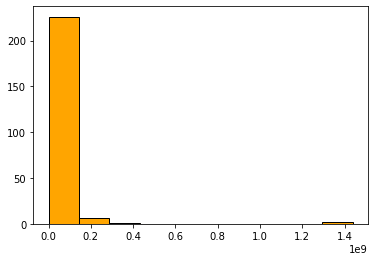

In [65]:
plt.hist(df['POPULATION_2020'], bins=10, color='orange', edgecolor='black')

Positively Skewed or Right skewed Distribution 

(array([ 1.,  2.,  6., 27., 55., 57., 34., 26., 22.,  5.]),
 array([-2.47 , -1.839, -1.208, -0.577,  0.054,  0.685,  1.316,  1.947,
         2.578,  3.209,  3.84 ]),
 <BarContainer object of 10 artists>)

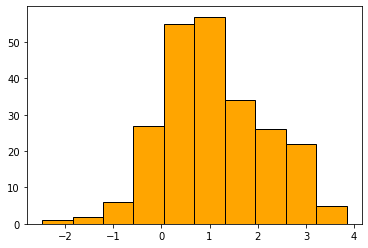

In [66]:
plt.hist(df['YEARLY_CHANGE'], bins=10, color='orange', edgecolor='black')

Approximately Normal Distribution

(array([34.,  0.,  0., 32., 25., 33., 35., 24., 36., 16.]),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ]),
 <BarContainer object of 10 artists>)

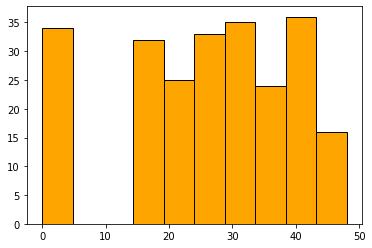

In [67]:
plt.hist(df['MEDIAN_AGE'], bins=10, color='orange', edgecolor='black')

More of an linear or unifrom distribution approximately

(array([ 4., 10., 16., 23., 20., 35., 29., 30., 36., 19.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

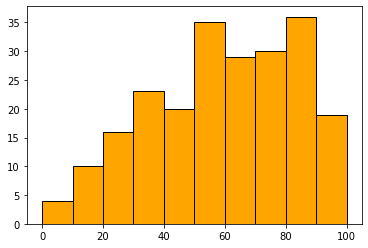

In [68]:
plt.hist(df['URBAN_POPULATION'], bins=10, color='orange', edgecolor='black')

Bimodal and skewed Distribution

## The lowest populated countries

In [190]:
df.sort_values(by='POPULATION_2020', ascending=False).head(10) #sorting based on population and arranging in descending order

,COUNTRY,POPULATION_2020,YEARLY_CHANGE,NET_CHANGE,DENSITY,LAND_AREA,MIGRANTS,FERTILITY_RATE,MEDIAN_AGE,URBAN_POPULATION,WORLD_SHARE
0,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
5,Brazil,212559417,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %
6,Nigeria,206139589,2.58 %,5175990,226,910770,-60000.0,5.4,18,52 %,2.64 %
7,Bangladesh,164689383,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %
8,Russia,145934462,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
9,Mexico,128932753,1.06 %,1357224,66,1943950,-60000.0,2.1,29,84 %,1.65 %


### China is the most populated country followed by India.

In [105]:
df.sort_values(by='POPULATION_2020', ascending=True).head(10)#sorting values based on population and arranging in asending order.

,COUNTRY,POPULATION_2020,YEARLY_CHANGE,NET_CHANGE,DENSITY,LAND_AREA,MIGRANTS,FERTILITY_RATE,MEDIAN_AGE,URBAN_POPULATION,WORLD_SHARE
234,Holy See,801,0.25,2,2003,0,NaN,N.A.,0,NaN,0.00 %
233,Tokelau,1357,1.27,17,136,10,NaN,N.A.,0,0.0,0.00 %
232,Niue,1626,0.68,11,6,260,NaN,N.A.,0,46.0,0.00 %
231,Falkland Islands,3480,3.05,103,0,12170,NaN,N.A.,0,66.0,0.00 %
230,Montserrat,4992,0.06,3,50,100,NaN,N.A.,0,10.0,0.00 %
229,Saint Pierre & Miquelon,5794,-0.48,-28,25,230,NaN,N.A.,0,100.0,0.00 %
228,Saint Helena,6077,0.30,18,16,390,NaN,N.A.,0,27.0,0.00 %
227,Saint Barthelemy,9877,0.30,30,470,21,NaN,N.A.,0,0.0,0.00 %
226,Nauru,10824,0.63,68,541,20,NaN,N.A.,0,NaN,0.00 %
225,Wallis & Futuna,11239,-1.69,-193,80,140,NaN,N.A.,0,0.0,0.00 %


Holy see is the lowest populated conutry with 801 populatiopn followed by Tokelau with 1357 population.

# CONCLUSION


### After exploring the data and performing different operations we can conclude that:

* Monaco has the heighest Density of 26337 followed by Macao with 21645 Density.

*  Greenland and falkland islands has the lowest Density of 0 followed by Western Sahara with 2.

* Niger has the highest fertility rate of 7 and South Korea has lowest fertility rate of 1.1

* Russia has the largest land area of 16376870

* China is the most populated country followed by India

* Holy see is the lowest populated conutry with 801 populatiopn followed by Tokelau with 1357 population.